### Importing important Libraries

In [1]:
# %pip install numpy 
# %pip install pandas 
# %pip install matplotlib
# %pip install pandas-datareader
# %pip install torch
# %pip install tensorflow

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pandas_datareader as web 
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
# from torch import inverse
# from torch_optimizer import Optimizer

In [30]:
#  Selecting Cryptocurrency and currency comparater
crypto_currency = 'ETH'
against_currency = 'INR'

In [31]:
#  Setting time frame for the training data 

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [32]:
#  Loading Financial Data
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
data.head()

High           Low          Open         Close  \
Date                                                                 
2017-11-11  20815.558594  19430.189453  19455.863281  20504.613281   
2017-11-12  20796.009766  19451.107422  20505.201172  20063.285156   
2017-11-13  21399.521484  20005.748047  20005.748047  20722.728516   
2017-11-14  22287.546875  20725.802734  20725.802734  22081.068359   
2017-11-15  22277.746094  21523.595703  22102.845703  21754.876953   

                  Volume     Adj Close  
Date                                    
2017-11-11   54884332639  20504.613281  
2017-11-12  105134352629  20063.285156  
2017-11-13   68170861653  20722.728516  
2017-11-14   69957072000  22081.068359  
2017-11-15   47161182116  21754.876953

In [33]:
#  Preparing Data
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling data between 0 and 1 to make it easy for nn to work
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
print(scaled_data.shape)
print(scaled_data[:5])


(1573, 1)
[[0.04129276]
 [0.04003051]
 [0.0419166 ]
 [0.0458016 ]
 [0.04486866]]


In [34]:
#  Preparing training Data
prediction_days = 10 # the number of days to predict the crypto on 
# future_day = 30

x_train,y_train = [],[]

for x in range(prediction_days,len(scaled_data)):
# for x in range(prediction_days,len(scaled_data)-future_day):  # unlock for a specific day after
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    # y_train.append(scaled_data[x+future_day,0]) # unlock this too

x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)


(1563, 10)
(1563, 10, 1)


In [35]:
# Create the neural network 
# pip install numpy == 1.19.5 
# use this command if there is a problem with numpy 

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.20))
model.add(LSTM(units=50))
model.add(Dropout(0.20))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')



In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [37]:
# training the model 
model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
49/49 [==============================] - 8s 20ms/step - loss: 0.0195
Epoch 2/25
49/49 [==============================] - 1s 20ms/step - loss: 0.0026: 0s - loss: 0
Epoch 3/25
49/49 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 4/25
49/49 [==============================] - 1s 19ms/step - loss: 0.0022
Epoch 5/25
49/49 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 6/25
49/49 [==============================] - 1s 25ms/step - loss: 0.0023
Epoch 7/25
49/49 [==============================] - 1s 26ms/step - loss: 0.0023
Epoch 8/25
49/49 [==============================] - 1s 23ms/step - loss: 0.0023: 0s - loss: 
Epoch 9/25
49/49 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 10/25
49/49 [==============================] - 1s 20ms/step - loss: 0.0022
Epoch 11/25
49/49 [==============================] - 1s 22ms/step - loss: 0.0022
Epoch 12/25
49/49 [==============================] - 1s 23ms/step - loss: 0.0023: 0s - loss

In [38]:
model.evaluate(x_train,y_train)

49/49 [==============================] - 2s 8ms/step - loss: 9.6736e-04


0.0009673584718257189

In [39]:
model.save(f'lstm_{crypto_currency}.h5')

In [11]:
# # from keras.utils import plot_model 
# from keras.utils.vis_utils import plot_model
# plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)
# from IPython.display import Image
# Image('model.png')

In [40]:
# Testing the model 

test_start = dt.datetime(2020,1,1) # (year.month,day)
# test_end = dt.datetime(2021,4,7) # this is for older testing 

test_end = dt.datetime.now()  # this should be used to do it for current trend


test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)


actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)



model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [42]:
#  Prediction 

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

In [43]:
print('prediction_prices: {}'.format(prediction_prices.shape))
print('x_test: {}'.format(x_test.shape))

prediction_prices: (793, 1)
x_test: (793, 10, 1)


In [44]:
model.evaluate(x_test,prediction_prices)

25/25 [==============================] - 2s 9ms/step - loss: 24464351232.0000


24464351232.0

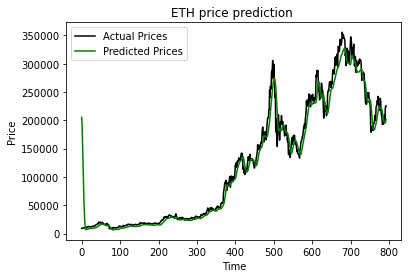

In [45]:
# plotting prediction v/s actual

plt.plot(actual_prices,color='black',label='Actual Prices')
plt.plot(prediction_prices,color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [46]:
# Predict next day 

# real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs)+1,0]]
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

ETH Price Tomorrow = 205242.265625 INR


In [ ]:
# 2971458.25 INR